![logo](https://github.com/rebeccahan0104/picture/raw/main/logo%402x.png)

# DS862 Final Project - Spotify Data Analysis

## Introduction 

### Background Information

Spotify is an online music streaming service platform, founded in Sweden in April 2006 by Daniel Ek and Martin Lorentzon. It is currently one of the largest streaming music service providers in the world. It is a digital music, podcast, and video streaming service that gives you access to millions of songs and other content from artists all over the world. We found the Spotify dataset on Kaggle that carries the artists’ records since 1921. https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks/tasks.


In this project, we have explored and analyzed the Spotify dataset. The file has multiple datasets but we only worked on two datasets — “data.csv”, “data_by_genre”. We also created a new dataset called "spotifyrating" that contains the artist ratings from User 1 -Yu Han and User 2 - Di Wang. 
This abundance of data will help us get to some key findings and answer our questions. 

### Project Goals

For this project, we are going to utilize machine learning algorithms to analyze the Spotify dataset.

The way Spotify recommended music to customers has a major influence on their listening habits. The goal of our project is to discover patterns and insights about the music in the dataset. In doing so, we gain a better understanding of musical behaviors when we listen to music on Spotify.

This analysis aims to answer these questions: 
* What characteristics of a song can determine its popularity?
* Can we predict a track’s popularity from key features about the song?
* The dataset includes thousands of genres, can we extract a pattern through clustering from the dataset?

First, we will do data exploration on the dataset. Then, we will predict the popularity of songs based on different features. Moreover, we are going to cluster different genres according to audio features. Lastly, we will build recommendation systems to suggest relevant artists to users.

* Goal 1: Complete data preprocessing and exploration 
* Goal 2: Make popularity prediction
* Goal 3: Perform genres clustering
* Goal 4: Build recommendation system 

### About the data

The datasets that we have worked on are two Spotify datasets on Kaggle plus a user rating dataset that is generated by the user. The "data.csv" file contains more than 160.000 songs collected from Spotify Web API and the "data_by_genre" is the data group by genres. The datasets contain about 19 columns which include the categorical and also numerical features. We have listed the explanations for each column below. 


Responsible Variable - y 

**pularity:**~100 int 0:least popluar, 100:most popluar 

Independent Variables - x 

**Acousticness:**
A confidence measure from 0.0 to 1.0 of whether the track is acoustic.
1.0 represents high confidence the track is acoustic.

**danceability:**
Danceability describes how suitable a track is for dancing based on a combination of musical elements. A value of 0.0 is least danceable and 1.0 is most danceable.

**energy:**
A measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

**explicit:** 
Whether or not the track has explicit lyrics ( true = yes it does 1; false = no it does not OR unknown 0).

**id:** 
The Spotify ID for the track

**instrumentalness:**
The relative ratio of the track is instrumental

**key:**
The primary key of the track 

**liveness:**
The relative duration of the track sounds like a live performance. A value above 0.8 provides a strong likelihood that the track is live.

**loudness:**
Relative loudness of the track in the typical range [-60, 0] in decibel (dB)

**mode:**
whether the track starts with a major (1) chord progression or not (0)

**name:**
the name of the track 

**release_date:** #drop this 
The date of release of the track in yyyy-mm-dd, yyyy-mm, or even yyyy format

**speechiness:**
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.

**tempo:**
The overall estimated tempo of a track in beats per minute (BPM).

**valence:**
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive

**year:**
the year of the track released 

**After introducing the datasets, we loaded the dataset into python and then began our analysis**

In [1]:
# Import the libraries that we need 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer # For text mining
from wordcloud import WordCloud, STOPWORDS

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder # Need to use it for year
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression # Logistic 
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest

from sklearn.cluster import KMeans # Clustering analysis
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE # Make graph for clusters
import matplotlib.patheffects as PathEffects

from sklearn.metrics.pairwise import cosine_similarity # For recommendation enfine

import warnings # Suppress warnings because they are annoying
warnings.filterwarnings('ignore')

In [2]:
# Load the data
data_song = pd.read_csv("data.csv")
data_song.head(1) #169909 rows × 17 columns

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.195,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.151,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.779,1928


In [3]:
data_song.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

# Part I: Feature Exploring and Visualization

In [4]:
# We want to explore the numerical data first.Since release date are very similar to year, we just keep the year. 
data_song = data_song.drop(['artists', 'id', 'release_date'],axis=1)

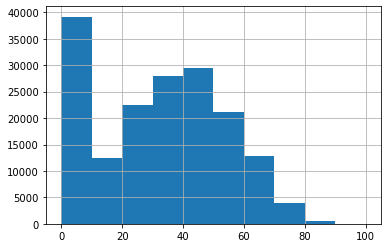

In [5]:
# Check the distribution of popularity
data_song['popularity'].hist()

From the chart above, we noticed that there are more data points falling on the x-axis where popularity is at 0. On the other hand, most song's popularity is between the range of 20-60. We are going to reconstruct the popularity column, and if the popularity is larger than 30, we will label the song as popular. Alternatively, if the value of popularity is less than 30, we will label it as less popular.

In [6]:
# Label the popularity - we use 30 as our cut-off point, to balance the total number of 0 and 1
data_song.loc[data_song['popularity'] <= 30, 'Target'] = 0  #less popular
data_song.loc[data_song['popularity'] > 30, 'Target'] = 1 #more popular 

In [7]:
# Output
data_song.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,Target
0,0.995,0.708,158648,0.1950,0,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928,0.0
1,0.994,0.379,282133,0.0135,0,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928,0.0
2,0.604,0.749,104300,0.2200,0,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928,0.0
3,0.995,0.781,180760,0.1300,0,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928,0.0
4,0.990,0.210,687733,0.2040,0,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928,0.0


In [8]:
# Define X and y
X = data_song.select_dtypes(include=['int64','float64']) # all numerical data
X = X.drop(['popularity','Target'], axis=1) # Delete popularity and target, we will use target as our y
y = data_song['Target']

In [9]:
# Try to have a balanced data
y.value_counts()

1.0    93185
0.0    76724
Name: Target, dtype: int64

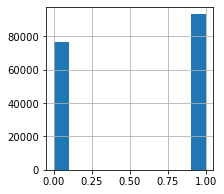

In [10]:
# Plot y variable
data_song['Target'].hist(figsize=(3,3))

When the target equals one (more popular), we have 93185 observations. When the target equals zero (less popular), we have 76724 observations.

<function matplotlib.pyplot.show(*args, **kw)>

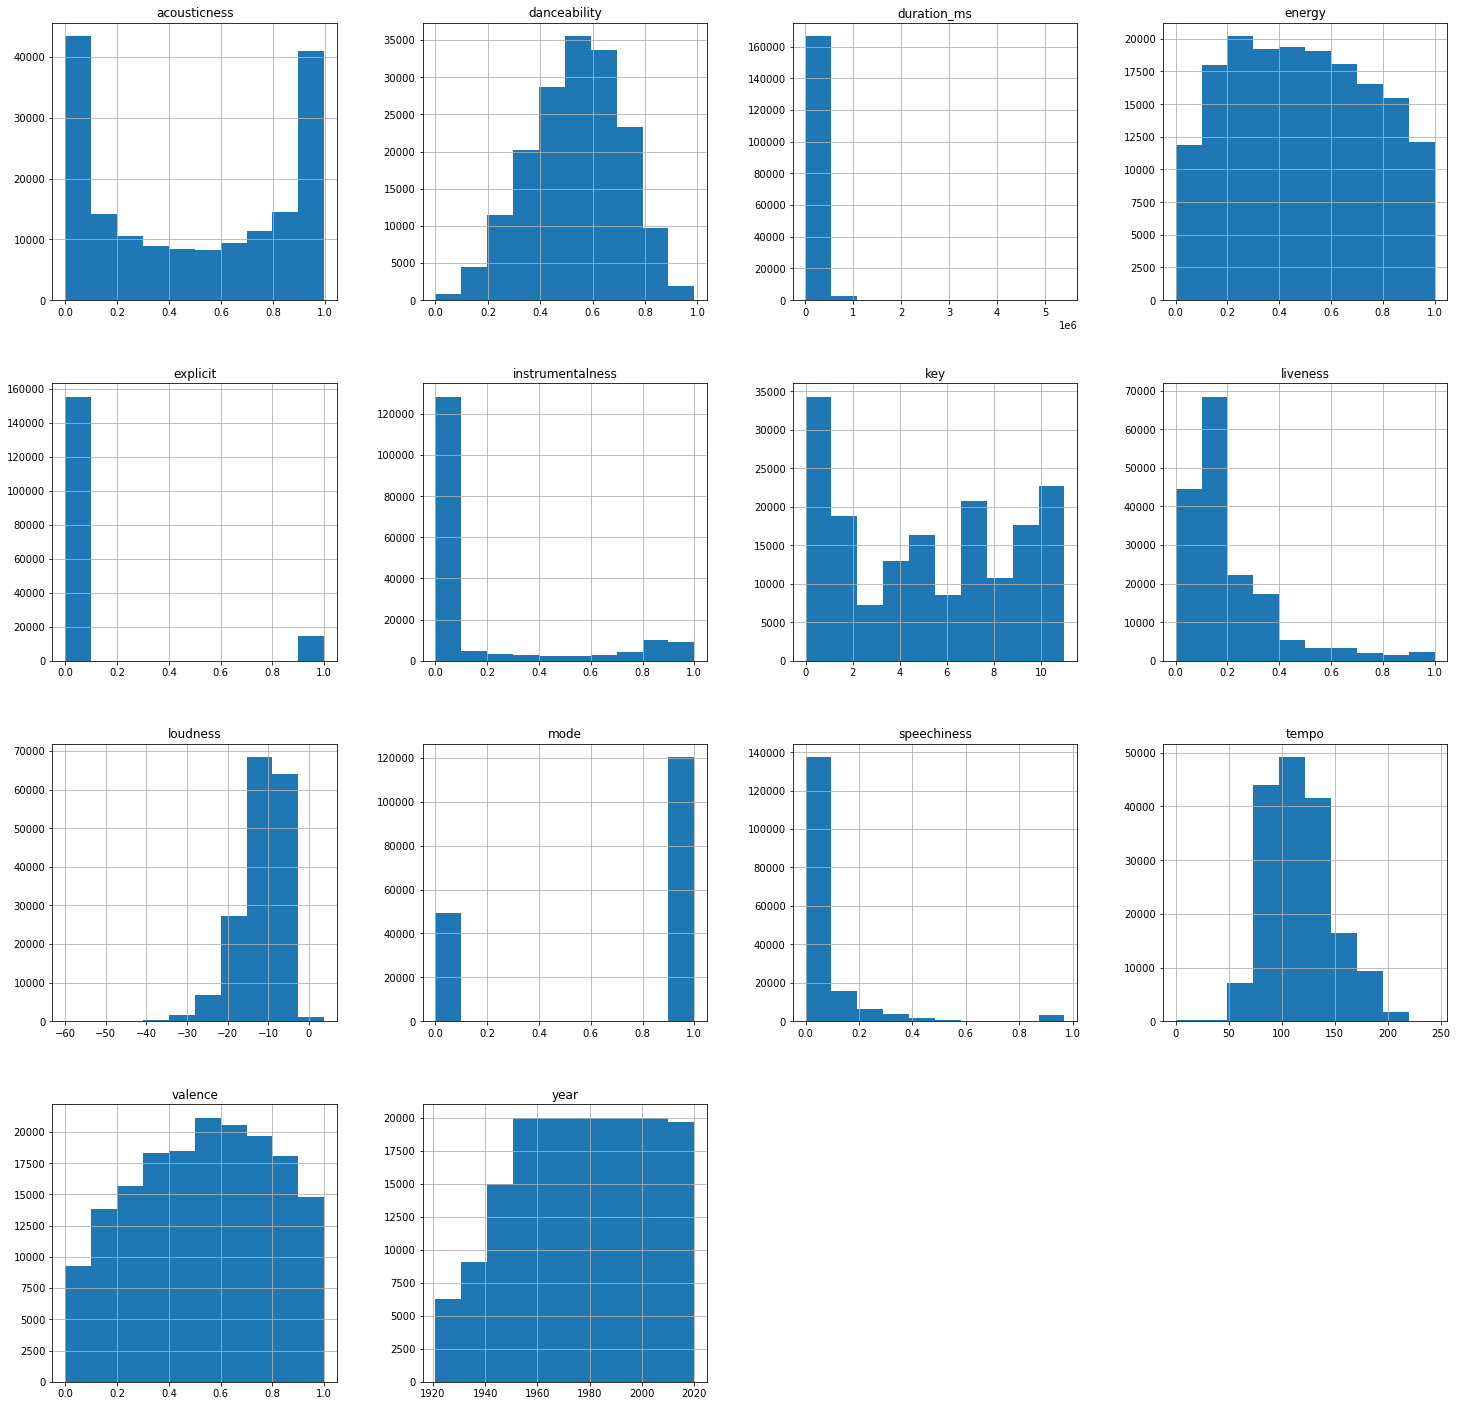

In [11]:
# Check all the x variables
X.hist(figsize=(25,25))
plt.show

From these graphs, we can see the range of different variables and their distributions. 

The first question we have is "Do the different features correlate with each other?" To a bold text answer this question better, we created a heatmap to find the correlation between these features

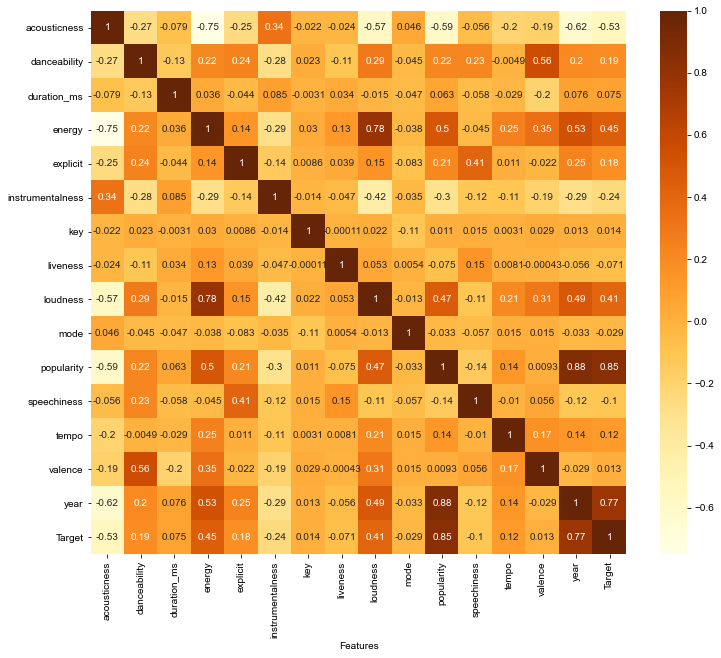

In [12]:
# Heatmap
f,ax = plt.subplots(figsize = (12,10)) #the size of the heat map
sns.heatmap(data_song.corr(), annot = True, fmt = '.2g', cmap = 'YlOrBr', ax= ax)
sns.set(font_scale = 0.75) #the font size of the value in the heat map
plt.xlabel('Features')
plt.show()

From the heatmap above, we find that the loudness and energy are highly correlated. Features such as valence and dance-ability also highly correlated. Also, most of the correlation is under 50%, so we will use these features to create a multi-linear regression later.  

Moreover, we are also curious about how the music feature's trend changed from the year 1921 to 2020. We have picked
six different features(danceability, energy, liveness, acousticness, valence, loudness) to create the line chart to observe the changes. 

In [13]:
# Check the performance between years
year_avg = data_song[['danceability','energy','liveness','acousticness', 'valence','year','loudness'
                     ]].groupby('year').mean().sort_values(by='year').reset_index()
year_avg.head()

,year,danceability,energy,liveness,acousticness,valence,loudness
0,1921,0.425661,0.236784,0.215814,0.895823,0.425495,-17.095438
1,1922,0.480000,0.237026,0.238647,0.939236,0.534056,-19.179958
2,1923,0.568462,0.246936,0.236656,0.976329,0.624788,-14.373882
3,1924,0.548654,0.347033,0.237875,0.935575,0.668574,-14.202304
4,1925,0.571890,0.264373,0.243094,0.965422,0.616430,-14.516707


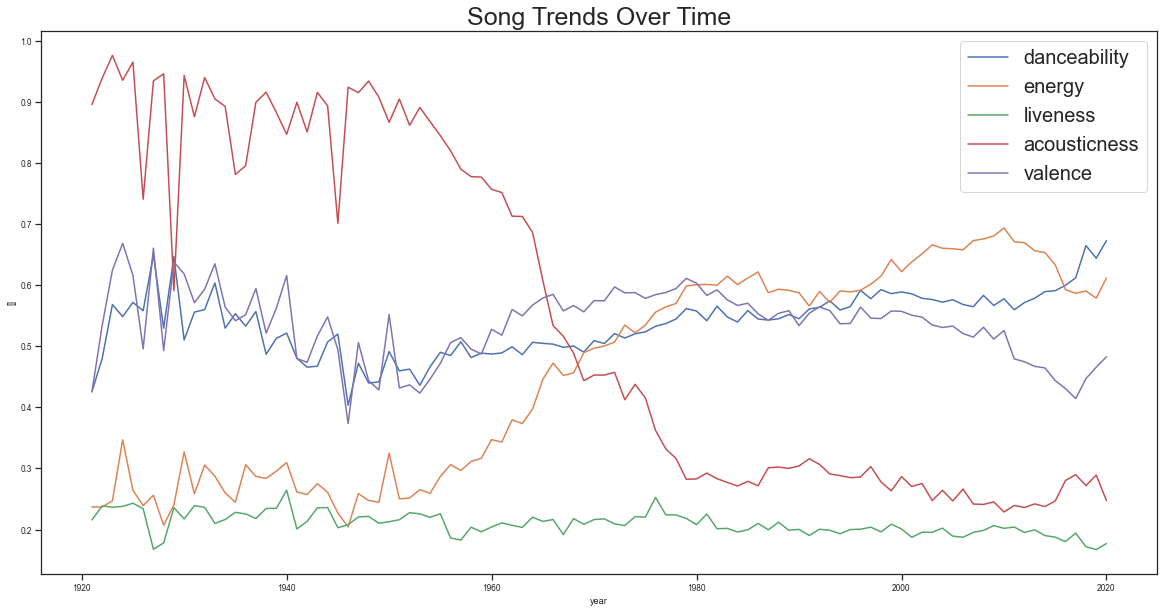

In [14]:
# Generate line chart for those five features (value 0 to 1) between different years
sns.set_style("ticks")
plt.figure(figsize=(20,10))
plt.title("Song Trends Over Time", fontsize=25)
lines = ['danceability','energy','liveness','acousticness','valence']
for line in lines:
    ax = sns.lineplot(x='year', y=line, data=year_avg)
plt.ylabel([ ])
plt.legend(lines,fontsize=20)

According to the line chart, it looks like the acousticness value began going down in 1960 while the energy feature kept going up from 1960. Acoustic music is music that solely or primarily uses instruments that produce sound through acoustic means, as opposed to electric or electronic means. Based on this, it would appear as if energy is the new trend now. Energy is correlated with loudness. As such, we can reasonably infer that loudness has increased since the year 1960. This line chart below answered our question. The value of the loudness of music has increased since the year 1960 and reached a peak after 2000.

Because the value range of loudness is different from the value range of danceability, energy, liveness, acousticness, and valence, so we create a separate graph for loudness. 

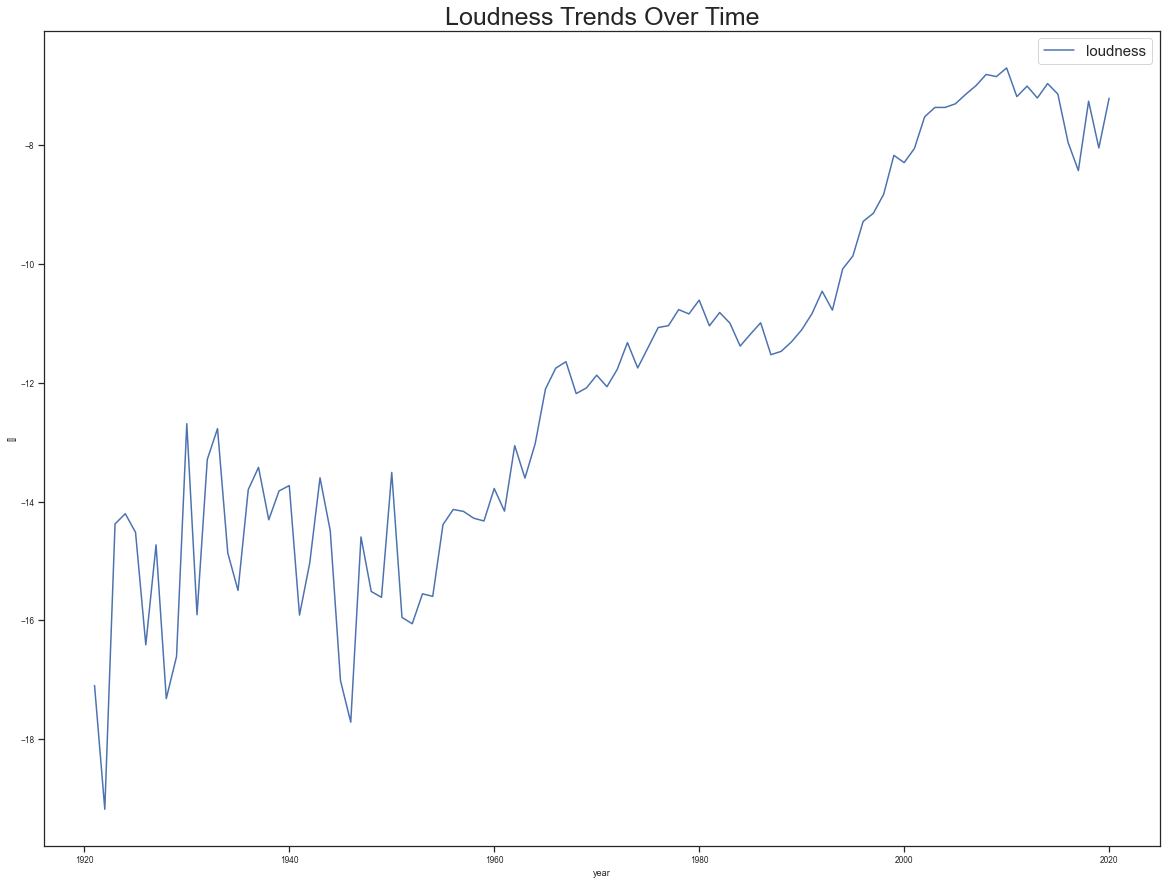

In [15]:
# Loudness trend (value -60 to 0)
plt.figure(figsize=(20,15))
plt.title("Loudness Trends Over Time", fontsize=25)
lines = ['loudness']
for line in lines:
    ax = sns.lineplot(x='year', y=line, data=year_avg)
plt.ylabel([ ])
plt.legend(lines,fontsize=15)

Then, we want to figure out "Does a song with more energy has more dancebility?"

<Figure size 1080x1080 with 0 Axes>

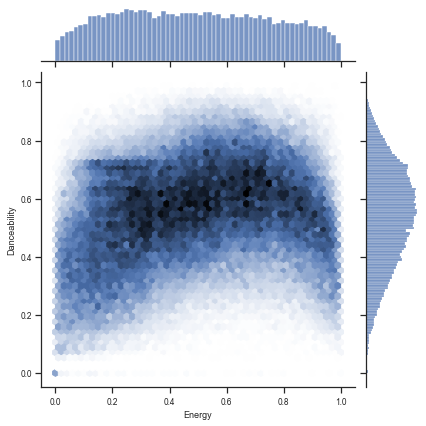

In [16]:
# Relationship between energy and dancebility
plt.figure(figsize=(15,15))
sns.jointplot(x='energy',y='danceability',data=data_song[['energy','danceability']],kind ="hex").set_axis_labels('Energy','Danceability')

From the plot above, it seems like energy and danceability are highly correlated. When the energy is between 0-0.8, they have a positive relationship. When the energy is above 0.8, the danceability begins to decrease as the energy increases. Most numbers of songs have energy levels between a 0.2–0.8 index while most songs are at danceability of 0.6.

## Text Mining

Since the dataset contains the song name, we want to know what kind of keywords are most common to use in the song names.

### Overall Performance

In [17]:
# Initialize the CountVectorizer
count_vect = CountVectorizer(stop_words = 'english', 
                             token_pattern = r'\b[^\d\W]+\b', 
                             analyzer='word', ngram_range=(1, 1), 
                             min_df = 1500)
# Run the CountVectorizer on the text
name_bag_o_words = count_vect.fit_transform(data_song['name']) 
name_bag_o_words.shape

(169909, 25)

In [18]:
# Most frequency words shows in song's name
print(count_vect.get_feature_names())

['act', 'allegro', 'blues', 'd', 'don', 'el', 'feat', 'ii', 'la', 'live', 'love', 'm', 'major', 'man', 'minor', 'op', 'remaster', 'remastered', 'remasterizado', 's', 'song', 't', 'time', 'version', 'часть']


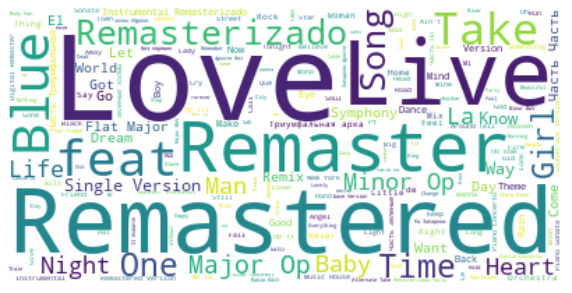

In [19]:
# Generate a word cloud image
text = " ".join(text for text in data_song.name)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image, the matplotlib way
plt.figure(figsize = (10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Overall, the most common keywords in these songs include "Love", "Heart", "Life" and "Baby". 

### Keywords with low popularity

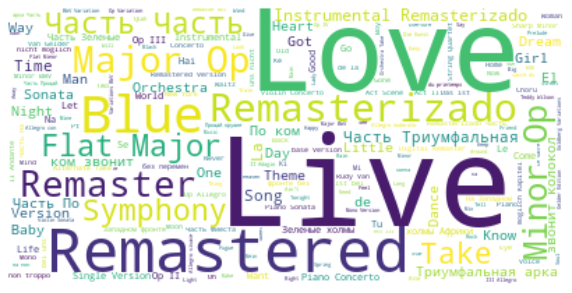

In [20]:
data_song_t0 = data_song[data_song['Target']==0] # Select target equals 0

# Generate a word cloud image
text = " ".join(text for text in data_song_t0.name)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image, the matplotlib way
plt.figure(figsize = (10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

For the songs that have lower popularity, we noticed the following keywords, "Live" and "Love" are both high-frequency vocabularies.

### Keywords with high popularity

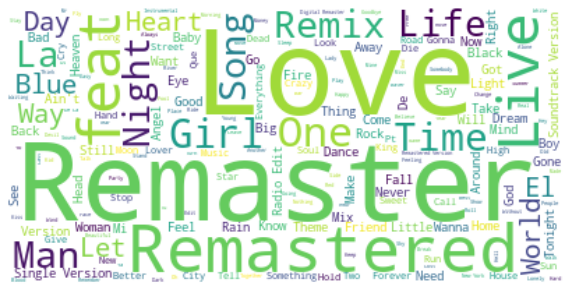

In [21]:
data_song_t1 = data_song[data_song['Target']==1] # Select target equals 1

# Generate a word cloud image
text = " ".join(text for text in data_song_t1.name)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image, the matplotlib way
plt.figure(figsize = (10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The words, “Remasters”, “feat” and “love” are high-frequency words used in the more popular song names.  

# PART II: Classification Models

Now, we are going to build the classification model to predict popularity. We are going to use the Logistic Regression, Naive Bayes, Decision Tree, and the Random Forest as the classifiers. 

Soft Voting Accuracy Check:

In [22]:
# Encode the year column to be categorical
X['year'] = LabelEncoder().fit_transform(X['year'])

# Split data into 80% - 20% train / test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

# Scale the data
scaler = StandardScaler()
X_trainS = scaler.fit_transform(X_train)
X_testS = scaler.transform(X_test)

In [23]:
# Define the individual models
LR = LogisticRegression()
GB = GaussianNB()
DT = DecisionTreeClassifier(random_state=123) 
RF1 = RandomForestClassifier(n_estimators=50, random_state=123)
RF2 = RandomForestClassifier(max_features=8, random_state=123)

# Fit the voting classifier
vc_soft = VotingClassifier(estimators = [('LR', LR), ('GB', GB), ('DT', DT), 
                                    ('RF1', RF1), ('RF2', RF2)], n_jobs = 2, voting='soft')
# Fit the model
vc_soft.fit(X_trainS, y_train)

# Prediction on test set
print('Voting soft:', accuracy_score(vc_soft.predict(X_testS), y_test))

Voting soft: 0.8618091931022306


The accuracy of the Soft Voting is 0.861. Now we are going to check the model accuracy for individual models.

Individual Model Accuracy Check:

In [24]:
# Evaluation (accuracy) on the test set -- individual models
LR.fit(X_trainS, y_train)
GB.fit(X_trainS, y_train)
DT.fit(X_trainS, y_train)
RF1.fit(X_trainS, y_train)
RF2.fit(X_trainS, y_train)
print('Logistic Regression:', accuracy_score(LR.predict(X_testS), y_test))
print('Gaussian Naive Bayes:', accuracy_score(GB.predict(X_testS), y_test))
print('Decision Tree:', accuracy_score(DT.predict(X_testS), y_test))
print('RandomForest 1:', accuracy_score(RF1.predict(X_testS), y_test))
print('RandomForest 2:', accuracy_score(RF2.predict(X_testS), y_test))

Logistic Regression: 0.8638102524866106
Gaussian Naive Bayes: 0.8276440468483315
Decision Tree: 0.8252015773056324
RandomForest 1: 0.8673121064092755
RandomForest 2: 0.869018892354776


With this dataset, it looks like the individual Random Forest Model is performing better with an accuracy score of 0.8690.

The confusion Matrix table is also a good way that we can check how the model performs on the feature prediction. We can apply the confusion matrix table to a heat map and check if the model did a good prediction job.

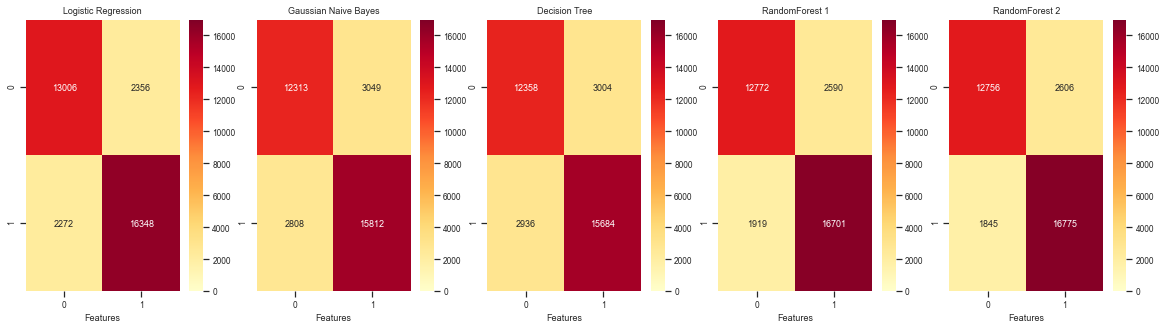

In [25]:
# Create the confusion matrix table for the performance of model

f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize = (20,5))
#1. Logistic Regression
LogregCM = confusion_matrix(y_test, LR.predict(X_testS))
sns.heatmap(LogregCM, annot = True, fmt = 'd', vmin = 0, vmax = 17000, cmap = 'YlOrRd', ax = ax1)
#Annot: the value of the heatmap
#fmt: the decimal point of value of heatmap
#vmin, vmax: the limits of the colorbar
ax1.set_title('Logistic Regression')
ax1.set_xlabel('Features')

#2. Gaussian Naive Bayes
NBCM = confusion_matrix(y_test, GB.predict(X_testS))
sns.heatmap(NBCM, annot = True, fmt = 'd', vmin = 0, vmax = 17000, cmap = 'YlOrRd', ax = ax2)
ax2.set_title('Gaussian Naive Bayes')
ax2.set_xlabel('Features')

#3. Decision Tree
DTCM = confusion_matrix(y_test, DT.predict(X_testS))
sns.heatmap(DTCM, annot = True, fmt = 'd', vmin = 0, vmax = 17000, cmap = 'YlOrRd', ax = ax3)
ax3.set_title('Decision Tree')
ax3.set_xlabel('Features')

#4. Random Forest1
RandomForest1CM = confusion_matrix(y_test, RF1.predict(X_testS))
sns.heatmap(RandomForest1CM, annot = True, fmt = 'd', vmin = 0 , vmax = 17000, cmap = 'YlOrRd', ax = ax4)
ax4.set_title('RandomForest 1')
ax4.set_xlabel('Features')

#5. Random Forest2
RandomForest2CM = confusion_matrix(y_test, RF2.predict(X_testS))
sns.heatmap(RandomForest2CM, annot = True, fmt = 'd', vmin = 0 , vmax = 17000, cmap = 'YlOrRd', ax = ax5)
ax5.set_title('RandomForest 2')
ax5.set_xlabel('Features')

plt.show()

We noticed that both Random Forest Models resulted in more accurate predictions. The Random Forest Model2 has predicted the 12756+16775=29531 correctly.

After we got the best classification model, we wanted to figure out which feature is the most important in predicting the popularity of a song. In order to answer this question, we created a feature importance graph chart.

Text(0.5, 0, 'Random Forest Feature Importance')

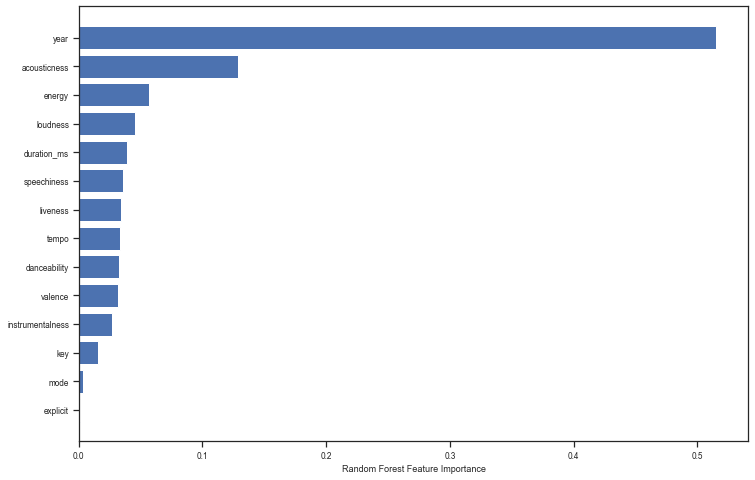

In [26]:
# Check the feature importance for the best model (RF2)
sorted_idx = RF2.feature_importances_.argsort()
plt.figure(figsize=(12,8))
plt.barh(X.columns[sorted_idx], RF2.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

From the chart above, it is easy to tell that year is the most important feature in predicting popularity. Key and mode are the less important features in predicting popularity. We will explore more on these features in the following content.


First, we took the year out and created a line chart to see if there was any insight here. According to the chart below, we noticed that the popularity increased from the year 1960 and reached a peak in 2015.

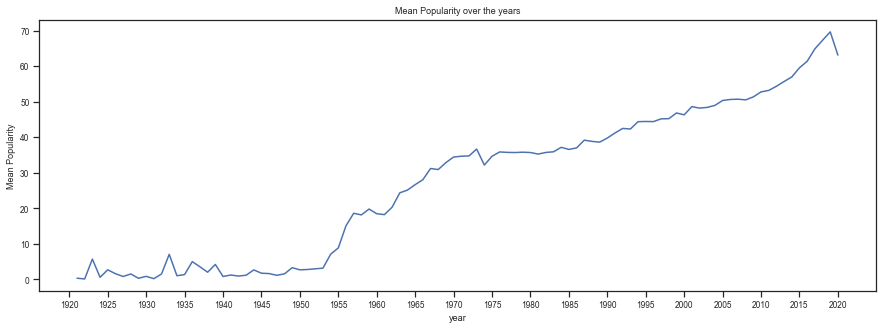

In [27]:
# Check the mean popularity between different years
fig, ax = plt.subplots(figsize=(15, 5))
ax = data_song.groupby('year')['popularity'].mean().plot()
ax.set_title('Mean Popularity over the years')
ax.set_ylabel('Mean Popularity')
ax.set_xticks(range(1920, 2021, 5))
plt.show()

The question we have on the Key feature is "Are certain keys more popular than others?"

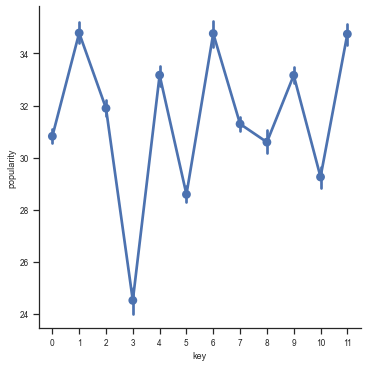

In [28]:
# Key vs Popularity
sns.factorplot('key','popularity', data = data_song)

From the chart above, we do notice that key 3 (D#) has the lowest popularity score while key 1 (C#), key 6 (F#), and key 11 (B) are more popular keys.

Different keys have different levels of popularity. Are songs that start with major chord progression more popular? Songs in a major key generally sound happier, while songs in a minor key are more melancholy or sad. Does this have an effect on popularity?

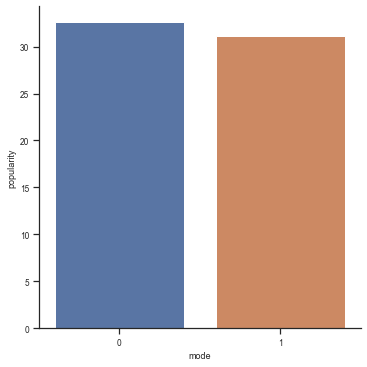

In [29]:
# Mode vs Popularity 
mode = data_song[['popularity', 'mode']].groupby('mode').mean().reset_index()
sns.catplot(data=mode, kind="bar", x='mode', y="popularity")

In [30]:
mode # See the average of popularity between 2 mode

,mode,popularity
0,0,32.662210
1,1,31.101852


By comparing the popularity mean between different mode, it looks like songs that start with a major (1) chord progression are slightly less popular than the songs that start with a non-major chord (0)

Does the duration of a song have an effect on its popularity?

In [31]:
# Create bins — 
# 0–0:59 = very short,1:00-1:59 = short 2:00–3:59 = medium, 4:00–5:59 = long,  >=6:00 = very long
song = data_song[['popularity', 'duration_ms']]
# Create a seconds column
song['duration_ms'] = song['duration_ms'].apply(lambda div: div / 1000)
# Group durations into categorical var column 'Length'
bin_names = ['very short','short', 'medium', 'long','very Long']
bin_numbers = [0, 59, 119, 239, 359, 999999999]
song['length'] = pd.cut(song['duration_ms'], bins = bin_numbers, labels = bin_names)
song.head()

,popularity,duration_ms,length
0,0,158.648,medium
1,0,282.133,long
2,0,104.300,short
3,0,180.760,medium
4,1,687.733,very Long


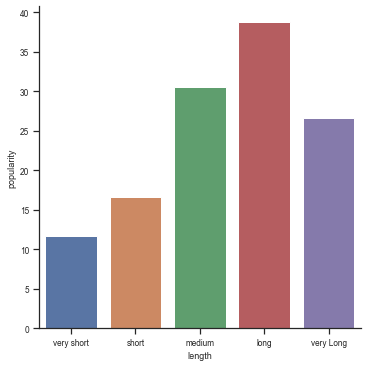

In [32]:
# See the popularity between different length of songs
song_length=song[['popularity', 'length']].groupby('length').mean().reset_index()
sns.catplot(data=song_length, kind="bar", x='length', y="popularity")

It can be clearly seen from the chart above, the songs with a duration length of 4–5:59 minutes are the most popular. This is followed by songs with a medium duration length (2-3:59 minutes). The "very short" songs, less than 1 minute were the least popular. 

# PART III:  Clustering

After we performed some data exploration, analysis, and built the classification model on the dataset, we continued working on the Spotify genres dataset. In this part of the project, we ran the k-means clustering to assign the genre observations in the cluster to the genre it belongs to.

In [33]:
# Load the data
data_genre = pd.read_csv("data_by_genres.csv")
data_genre.head(1) #2664 rows × 14 columns

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,432hz,0.49478,0.299333,1.048887e+06,0.450678,0.477762,0.131,-16.854,0.076817,120.285667,0.22175,52.166667,5,1


In [34]:
# Prepare data for clustering analysis
data = data_genre.copy()
data = data.drop(['genres'], axis=1)
scaler = StandardScaler()
scale_data = scaler.fit_transform(data)
data_s = pd.DataFrame(scale_data)
# Present the data
data_s.head() 

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.304949,-1.597132,8.829288,-0.501271,1.083808,-0.714516,-1.297072,-0.086454,0.082030,-1.404830,0.752245,-0.270102,0.431403
1,0.892625,-0.101537,-0.215688,-0.717369,-0.012824,0.315066,-0.461056,0.355823,-0.389399,0.084163,-1.151201,0.319936,0.431403
2,0.708760,0.272420,-0.615465,-0.962797,-0.765721,-0.758992,-0.479306,0.144446,-0.401494,-0.233378,0.201851,1.500011,0.431403
3,-0.126366,-0.518783,1.034055,-0.341596,2.307708,-0.845450,-0.743990,-0.503109,0.336422,-0.983496,0.086224,-1.450177,0.431403
4,-0.145635,1.062722,-0.171825,0.214076,0.582917,-1.038971,0.736275,0.744901,0.031393,0.682790,1.153939,1.204992,-2.318018


We choose k from 2 to 9 and check the performance. 

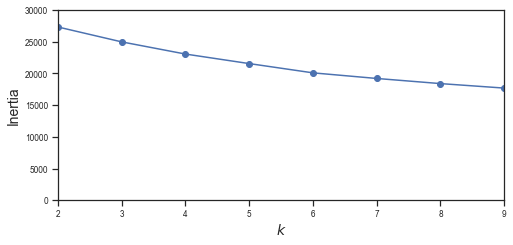

In [35]:
# Run K-Means for various number of clusters. 
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(data_s)
                for k in range(2, 10)]

# Extract the inertia for each model
inertias = [model.inertia_ for model in kmeans_per_k]

# Plot the inertia
plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

plt.axis([2, 9, 0, 30000])
plt.show()

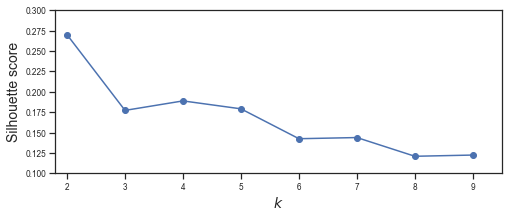

In [36]:
# Calculate the silhouette score for K = 1..10
silhouette_scores = [silhouette_score(data_s, model.labels_)
                     for model in kmeans_per_k[0:]]


plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 9.5, 0.1, 0.3])
plt.show()

Looks like we could choose 5 as our k value

In [37]:
# With our selected K value
new_data = KMeans(n_clusters=5, random_state=42).fit(data_s)
new_data.labels_

array([2, 4, 4, ..., 1, 4, 1], dtype=int32)

In [38]:
# Prepare for scatter plot of the 5 clusters
label_data=new_data.labels_

### Test if 5 clusters is a good choice for our data

In order to check if we picked good cluster numbers for our model, we utilized the t-Distributed Stochastic Neighbor Embedding to generate the cluster plot. t-SNE is a non-linear dimensionality reduction algorithm used for exploring high-dimensional data. It maps multi-dimensional data to two or more dimensions suitable for human observation.

In [39]:
# A good way to make the plot - TSNE
genres_tsne = TSNE(random_state=42).fit_transform(data_s)

In [40]:
# Ref: https://www.datacamp.com/community/tutorials/introduction-t-sne
# Create a scatter plot function
def genres_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

(<Figure size 576x576 with 1 Axes>,
 [Text(-16.534327, 45.761208, '0'),
  Text(29.911247, -1.4624691, '1'),
  Text(-31.423939, -22.566519, '2'),
  Text(-75.46229, 6.233875, '3'),
  Text(-14.546564, 6.9347134, '4')])

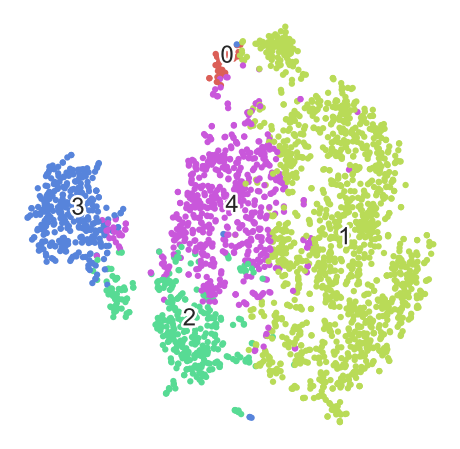

In [41]:
# Generate the graph
genres_scatter(genres_tsne, label_data)

The cluster plot is clearly distinct for each cluster. As such, based on the results, we used 5 as the cluster number. Now, we can check the performance of the different clusters.

In [42]:
# Check the performance of different clusters
data_agg = pd.concat([data, pd.DataFrame({'cluster':new_data.labels_})], axis=1)
data_agg.groupby('cluster').mean()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
cluster,,,,,,,,,,,,,
0,0.718922,0.611806,311855.339773,0.383781,0.035371,0.312087,-15.463545,0.616567,110.250612,0.516410,16.188509,6.468750,0.781250
1,0.197856,0.568598,246508.460803,0.698905,0.139725,0.195205,-7.693435,0.085499,123.698536,0.524143,47.184845,6.007262,1.000000
2,0.833267,0.334015,305830.800969,0.210789,0.575361,0.170556,-19.757313,0.051716,103.914239,0.234219,31.628584,5.170520,0.841040
3,0.235661,0.592219,252932.135996,0.677778,0.143475,0.183818,-7.960070,0.082914,124.018261,0.533705,47.086601,6.544073,0.000000
4,0.692758,0.545578,217075.488170,0.403061,0.160433,0.203768,-12.240984,0.069768,113.783923,0.577960,25.777036,5.755172,0.953448


![clusterinfo](https://github.com/rebeccahan0104/picture/raw/main/clusterinfo.jpeg)

Observations on each cluster:

* Cluster 0: In this cluster, the genres have high acousticness, livenesss and speechness but also the lowest popularity.

    
* Cluster 1: Genres in this cluster have the highest popularity and most likely start with major (1) chord progression


* Cluster 2: For Cluster 2, we noticed the genres have the highest average acousticness and instrumentalness, but the energy level is the lowest. Moreover, for other features like danceability, duration_ms, loudness, and valence are relatively lower than other clusters. 

    
* Cluster 3: Genres here in this cluster have the shortest duration, and are relatively more popular. The songs in this genre are most likely start with non-major key(average mode=0)

    
* Cluster 4: Compared with other clusters, this cluster doesn't have anything that stands out. 
    

For each cluster, we checked the performance of the specific feature. Now, let's see what genre's name appears in each cluster.

### Which genres appear in different groups?

In order to better understand each cluster, we want to create the word cloud for each cluster. In the word cloud, we can easily read which genres appeared more frequently in this cluster.

In [43]:
# Check the genres with labels
data_genre_agg = pd.concat([data_genre, pd.DataFrame({'cluster':new_data.labels_})], axis=1)
# Check the genre name after with 5 clusters
cluster0 = data_genre_agg.loc[data_genre_agg['cluster'] == 0, 'genres']
cluster1 = data_genre_agg.loc[data_genre_agg['cluster'] == 1, 'genres']
cluster2 = data_genre_agg.loc[data_genre_agg['cluster'] == 2, 'genres']
cluster3 = data_genre_agg.loc[data_genre_agg['cluster'] == 3, 'genres']
cluster4 = data_genre_agg.loc[data_genre_agg['cluster'] == 4, 'genres']
c0 = pd.DataFrame(cluster0.head(20)).reset_index()
c1 = pd.DataFrame(cluster1.head(20)).reset_index()
c2 = pd.DataFrame(cluster2.head(20)).reset_index()
c3 = pd.DataFrame(cluster3.head(20)).reset_index()
c4 = pd.DataFrame(cluster4.head(20)).reset_index()

Word cloud image for cluster0:

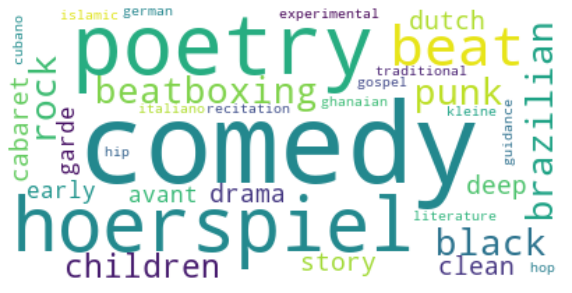

In [44]:
# Generate a word cloud image for cluster0
text = " ".join(text for text in c0.genres)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image, the matplotlib way
plt.figure(figsize = (10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

For the first cluster, we noticed that the comedy, poetry, and hoerspiel genres appeared more frequently. 

Word cloud image for cluster1:

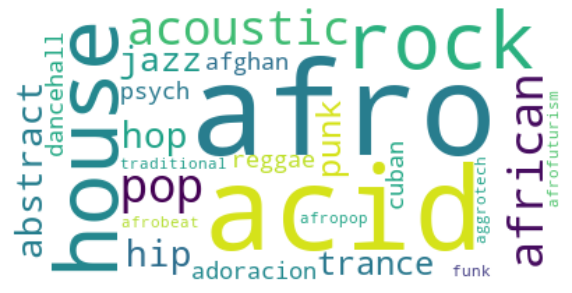

In [45]:
# Generate a word cloud image for cluster1
text = " ".join(text for text in c1.genres)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image, the matplotlib way
plt.figure(figsize = (10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In the second cluster, acid rock, house, and also afro music appeared the most frequently.

Word cloud image for cluster2:

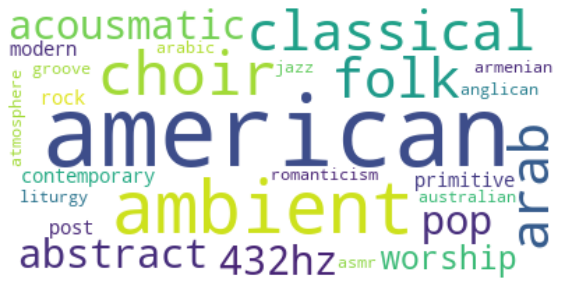

In [46]:
# Generate a word cloud image for cluster2 
text = " ".join(text for text in c2.genres)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image, the matplotlib way
plt.figure(figsize = (10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

It would appear as if there is more American, Classical, and folk / ambient music in this cluster.

Word cloud image for cluster3:

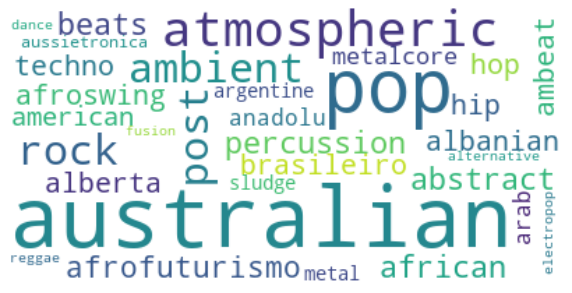

In [47]:
# Generate a word cloud image for cluster3
text = " ".join(text for text in c3.genres)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image, the matplotlib way
plt.figure(figsize = (10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In this cluster, we noticed that Australian and pop appear the most. 

Word cloud image for cluster4:

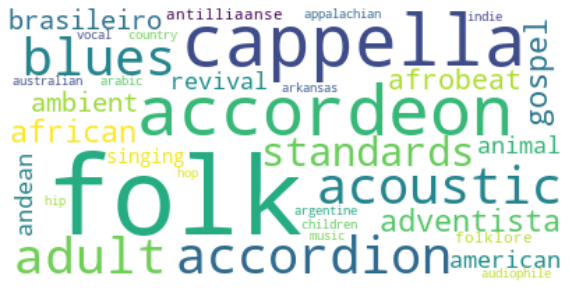

In [48]:
# Generate a word cloud image for cluster4
text = " ".join(text for text in c4.genres)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image, the matplotlib way
plt.figure(figsize = (10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In this cluster, we noticed folk and Cappella music appear the most.

# PART IV: Recommendation Engine

For the last part of this project, we will build models to provide the artist recommendation base on the item attribution and the user's profile. The data we use here is the Spotify Rating data which includes the artists(only for the year 2020) and User1-Yu Han's rating on the artist and User2-Di Wang's rating on the artist and also the genres that the artist belongs to. 

How can we make the recommendation if we only have the artist's name? 

### Use the item attribution to provide recommendation

In [49]:
# Load the data
rate = pd.read_csv("SpotifyRating.csv")
rate['genres'] = rate['genres'].str.replace("^\[|\]$","")
rate['genres'] = rate['genres'].str.replace("'", '')

# Replace missing values with 0
rate = rate.fillna(0)

rate.head(5) #380 rows × 4 columns

,artists,User1,User2,genres
0,SuicideBoys,2.0,0.0,"dark trap, new orleans rap, underground hip hop"
1,(G)I-DLE,3.0,5.0,"k-pop, k-pop girl group"
2,22Gz,2.0,0.0,nyc rap
3,5 Seconds of Summer,4.0,3.0,"boy band, dance pop, pop, post-teen pop"
4,645AR,1.0,0.0,meme rap


In [50]:
# Create a dataframe using artists as index - prepare for cosine similarity
rate2 = rate.copy()
rate2.set_index("artists", inplace = True)
rate2

,User1,User2,genres
artists,,,
SuicideBoys,2.0,0.0,"dark trap, new orleans rap, underground hip hop"
(G)I-DLE,3.0,5.0,"k-pop, k-pop girl group"
22Gz,2.0,0.0,nyc rap
5 Seconds of Summer,4.0,3.0,"boy band, dance pop, pop, post-teen pop"
645AR,1.0,0.0,meme rap
...,...,...,...
girl in red,0.0,3.0,"bedroom pop, indie pop, norwegian indie, pop"
iann dior,0.0,0.0,"melodic rap, pop rap"
jxdn,0.0,0.0,social media pop


In [51]:
# Extract the genres
genres = rate2['genres'].str.get_dummies(',')
genres.head()

,atl hip hop,atl trap,australian pop,bedroom soul,bergen indie,blues rock,brostep,calming instrumental,canadian contemporary country,canadian contemporary r&b,...,pop rap,r&b en espanol,rap,regional mexican pop,sertanejo universitario,sleep,social media pop,texas country,trap,vapor trap
artists,,,,,,,,,,,,,,,,,,,,,
SuicideBoys,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
(G)I-DLE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22Gz,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5 Seconds of Summer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
645AR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# Calculate the cosine similarity of the artist (based on genres)
genres_sim = cosine_similarity(genres)
genres_sim = pd.DataFrame(genres_sim, index = genres.index, columns = genres.index)

In [53]:
# Function that take the artist name and return the top n recommendations
def print_recommendations(original_item, top_n):
    idx = original_item
    print("Your original artist is", rate[rate['artists'] == str(idx)]['artists'].values)
    recommends = genres_sim.loc[str(idx)].sort_values(ascending = False)[2:].index
    for i in range(top_n):
        rec_artist = recommends[i]
        print("My number ", i+1, " recommendation artist is ", rate[rate['artists'] == rec_artist]['artists'].values)

In [54]:
# Let's see what the recommendation output, use BTS as our oiginal artist
print_recommendations('BTS', 10)

Your original artist is ['BTS']
My number  1  recommendation artist is  ['GOT7']
My number  2  recommendation artist is  ['Monsta X']
My number  3  recommendation artist is  ['NCT 127']
My number  4  recommendation artist is  ['NCT DREAM']
My number  5  recommendation artist is  ['TOMORROW X TOGETHER']
My number  6  recommendation artist is  ['CHUNG HA']
My number  7  recommendation artist is  ['BAEKHYUN']
My number  8  recommendation artist is  ['TWICE']
My number  9  recommendation artist is  ['ITZY']
My number  10  recommendation artist is  ['IZ*ONE']


The recommendations are relatively accurate for us. The input is BTS- a Korean Pop boy group. The first recommendation is also the Korean Pop boy group - Got7. Moreover, all the recommendations are Korean pop singers or groups which align with our inputs.

![Recommendation](https://github.com/rebeccahan0104/picture/blob/main/bts.jpeg?raw=true)

Looks like the item-based recommendation system works well. We are also curious if we add the user ratings to the artist dataset, will the model be able to predict user's preferences?

### Use the user rating profile to provide recommendation

- User1 - Yu Han

In [55]:
# First, we extract the rating matrix of user id 1
user_rating = rate[['User1']]
user_rating=user_rating.transpose()

In [56]:
# Rename columns with artists name 
user_rating.columns=rate['artists']
user_rating

artists,SuicideBoys,(G)I-DLE,22Gz,5 Seconds of Summer,645AR,6LACK,6ix9ine,A Boogie Wit da Hoodie,A Day To Remember,A$AP Ferg,...,Zion & Lennox,blackbear,boy pablo,chillchild,dvsn,girl in red,iann dior,jxdn,keshi,mike.
User1,2.0,3.0,2.0,4.0,1.0,3.0,3.0,3.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
# Now let's create the weighted attribute matrix for the artists the user has watched
weighted_attribute = pd.DataFrame(columns = genres.columns)
listened = np.where(user_rating.iloc[0,:] != 0)[0] # Which artists did the user rated
artist_id = user_rating.columns[listened] # The IDs of the rated artists
for i in range(len(listened)):
    ID = artist_id[i]
    scores = np.array(user_rating.iloc[:,listened[i]]) * np.array(genres.loc[ID,:]) # Calculate the weighted attributes
    scores = pd.DataFrame(scores).T # Convert the result from array to dataframe
    scores.columns = genres.columns # Attach column names to the dataframe
    weighted_attribute = weighted_attribute.append(scores)

weighted_attribute.index = artist_id # Add the artist indices to the dataframe

In [58]:
# This is what the weighted attribute looks like
weighted_attribute.head() 

,atl hip hop,atl trap,australian pop,bedroom soul,bergen indie,blues rock,brostep,calming instrumental,canadian contemporary country,canadian contemporary r&b,...,pop rap,r&b en espanol,rap,regional mexican pop,sertanejo universitario,sleep,social media pop,texas country,trap,vapor trap
artists,,,,,,,,,,,,,,,,,,,,,
SuicideBoys,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(G)I-DLE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22Gz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5 Seconds of Summer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
645AR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
# Next we will create the scaled attribute score
scaled_attribute = np.sum(weighted_attribute, axis = 0)/ np.sum(np.sum(weighted_attribute))

In [60]:
# Now for each unlistened artist, calculate the weighted rating 
# Remove watched movies from the movie attribute matrix
artist_drop = genres.drop(index = map(str, artist_id))

# Calculate the weighted rating
weighted_rating = artist_drop.mul(scaled_attribute, axis=1)

# And get the overall rating for each movie
new_ratings = np.sum(weighted_rating, axis = 1)

In [61]:
# Sort the new ratings in descending order
nr = new_ratings.sort_values(ascending = False)

# Print the recommendation for user 1
result = pd.DataFrame(nr.head(10)).reset_index().rename(columns={0:"Predicted Rating"})
result['Recommendation number for user 1'] = range(1,11)
result = result[['Recommendation number for user 1','artists','Predicted Rating']]
result

,Recommendation number for user 1,artists,Predicted Rating
0,1,T-Pain,0.272803
1,2,The Pussycat Dolls,0.251658
2,3,Tove Lo,0.231343
3,4,Sean Kingston,0.208955
4,5,Troye Sivan,0.204395
5,6,Taylor Swift,0.199834
6,7,Selena Gomez,0.199834
7,8,Sean Paul,0.181177
8,9,Trey Songz,0.176202
9,10,Russ,0.169154


- User2 - Di Wang

In [62]:
# Next, we extract the rating matrix of user id 2
user_rating = rate[['User2']]
user_rating=user_rating.transpose()

# Rename columns with artists name 
user_rating.columns=rate['artists']
user_rating

artists,SuicideBoys,(G)I-DLE,22Gz,5 Seconds of Summer,645AR,6LACK,6ix9ine,A Boogie Wit da Hoodie,A Day To Remember,A$AP Ferg,...,Zion & Lennox,blackbear,boy pablo,chillchild,dvsn,girl in red,iann dior,jxdn,keshi,mike.
User2,0.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0


In [63]:
# Now let's create the weighted attribute matrix for the artists the user has watched
weighted_attribute = pd.DataFrame(columns = genres.columns)
listened = np.where(user_rating.iloc[0,:] != 0)[0] # Which artists did the user rated
artist_id = user_rating.columns[listened] # The IDs of the rated artists
for i in range(len(listened)):
    ID = artist_id[i]
    scores = np.array(user_rating.iloc[:,listened[i]]) * np.array(genres.loc[ID,:]) # Calculate the weighted attributes
    scores = pd.DataFrame(scores).T # Convert the result from array to dataframe
    scores.columns = genres.columns # Attach column names to the dataframe
    weighted_attribute = weighted_attribute.append(scores)

weighted_attribute.index = artist_id # Add the artist indices to the dataframe

# Next we will create the scaled attribute score
scaled_attribute = np.sum(weighted_attribute, axis = 0)/ np.sum(np.sum(weighted_attribute))

# Now for each unlistened artist, calculate the weighted rating 
# Remove watched movies from the movie attribute matrix
artist_drop = genres.drop(index = map(str, artist_id))

# Calculate the weighted rating
weighted_rating = artist_drop.mul(scaled_attribute, axis=1)

# And get the overall rating for each movie
new_ratings = np.sum(weighted_rating, axis = 1)

In [64]:
# Sort the new ratings in descending order
nr = new_ratings.sort_values(ascending = False)

# Print the recommendation
result2 = pd.DataFrame(nr.head(10)).reset_index().rename(columns={0:"Predicted Rating"})
result2['Recommendation number for user 2'] = range(1,11)
result2= result2[['Recommendation number for user 2','artists','Predicted Rating']]
result2

,Recommendation number for user 2,artists,Predicted Rating
0,1,T-Pain,0.306544
1,2,Cheat Codes,0.265212
2,3,Kelly Clarkson,0.243398
3,4,Ellie Goulding,0.243398
4,5,Kelly Rowland,0.238806
5,6,Tove Lo,0.235362
6,7,FLETCHER,0.235362
7,8,MARINA,0.235362
8,9,Halsey,0.234214
9,10,6LACK,0.233065


In [65]:
# Print the result for user1 and user2
final_result= pd.concat([result, result2,], axis=1, sort=False)
final_result

,Recommendation number for user 1,artists,Predicted Rating,Recommendation number for user 2,artists,Predicted Rating
0,1,T-Pain,0.272803,1,T-Pain,0.306544
1,2,The Pussycat Dolls,0.251658,2,Cheat Codes,0.265212
2,3,Tove Lo,0.231343,3,Kelly Clarkson,0.243398
3,4,Sean Kingston,0.208955,4,Ellie Goulding,0.243398
4,5,Troye Sivan,0.204395,5,Kelly Rowland,0.238806
5,6,Taylor Swift,0.199834,6,Tove Lo,0.235362
6,7,Selena Gomez,0.199834,7,FLETCHER,0.235362
7,8,Sean Paul,0.181177,8,MARINA,0.235362
8,9,Trey Songz,0.176202,9,Halsey,0.234214
9,10,Russ,0.169154,10,6LACK,0.233065


The recommendations artists list based on User 1's rating is also pretty accurate. Tove Lo, Taylor Swift, and Selena Gomez are Yu's favorite artists. She is excited to try the artists on the recommendation list. For Di, she is a fan of Kelly Clarkson and Ellie Goulding - both of which appear in the list. 

# Conclusion

In conclusion, we performed data exploration and built the prediction model on the Spotify dataset. We also created the cluster model and recommendation system that performs relatively well as demonstrated above. In the future, we can use this dataset to answer more questions such as, "What's the average length of songs for different artists?" or "Analyze the data of user's favorite artist". 

# References 

* https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/ 
* https://medium.com/swlh/analyzing-spotify-data-with-pandas-96be8769fa57   
* https://www.datacamp.com/community/tutorials/introduction-t-sne 
* https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks/tasks |